### Generic API 
* SGD classifier 

### Specific API 
* Logistic Regression 
* Ridge Classifier
* Perceptron 
* KNN
* SVM
* Naive Bayes 

### Modeling 
* Model training --> `fit`
* Prediction --> 
    * `predict(X)` --> class label 
    * `decision_function(X)` --> confidence score for samples
* Evaluation --> `score` --> accuracy

#### Miscellaneous methods 
* **get_params** --> gets parameter for this estimator 
* **set_params** --> sets parameter for this estimator 
* **densify** --> converts coefficient matrix to dense array format  
* **sparsify** --> converts coefficient matrix to sparse format 


------------
#### Ridge Classifier 
##### Binary Classification 
converts binary targets to {-1, 1} and then treats the problem as regression task.
* sklearn provides different solvers for this optimization 
* alpha is the reg rate
     
##### Multiclass Classification 
treated as multioutput regression 
* predicted class corresponds to the output with the highest value

> default alpha value = 0.1

In [ ]:
from sklearn.linear_model import RidgeClassifier 
ridge_classifier = RidgeClassifier(alpha = 0.01)

ridge_classifier.fit(X_train, y_train)

#### Optimization 
* solver 
    * **SVD** --> uses SVD of the feature matrix to compute the ridge coefficient 
    * **cholesky** --> uses `scipy.linalg.solve` function to obtain the closed form solution 
    * **sparse_cg** --> uses conjugate gradient solver of `scipy.sparse.linalg.cg`
    * **lsqr** --> uses dedicated regularized least-sq routine `scipy.sparse.linalg.lsqr` and *its the fastest*.
    * **sag, saga** --> sag uses stochastic avg gradient descent iterative procedure saga is unbiased and more flexible version of sag 
    * **lbfgs** --> uses L-GFGS-B algo implemention in scipy.optimize.minimize . can be used *only when coefficients are forced to be positive.*

```py
from scipy.linalg import solve
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import lsqr
from scipy.optimize import minimize
```

> * for large scale data use `sparse_cg` solver.
> * when both num of features and num of samples are large use `sag` or `saga` solver. <br>
    > NOTE that fast convergence is only guranteed on features with approx the same scale 

> `solver = auto` chooses the solver automatically based on the type of data so the default choice is always auto 

In [ ]:
if solver == 'auto' : 
    if return_intercept : 
        solver = 'sag'
    elif not sparse.issparse(X) :
        solver = 'cholesky'
    else : 
        solver = 'sparse_cg'



> ##### Is intercept estimation necessary for RidgeClassifier? 
> if the data is already centered, set `fit_intercept` as false, so that no intercept will be used in calculation. by default its true 




In [ ]:
ridge_classifier = RidgeClassifier(alpha = 0.01, fit_intercept = False)
ridge_classifier.fit(X_train, y_train)

y_pred = ridge_classifier.predict(X_test)

ridgeClassifierCV implements RidgeClassifier with cross validation 

------------
#### Perceptron Classifier 

* its the simplest classification algo suitable for large scale learning 
* it shares the same underlying implementation with `SGDClassifier` 

```py
Perceptron() == SGDClassifier(
    loss = 'perceptron', eta0 = 1, 
    learning_rate = 'constant', penalty = None
)
```

Hyperparameter 
* penalty = l2/l1 (default l2)
* l1_ratio = 0.1 (default 0.15)
* alpha = 0.01 (default 0.0001)
* early_stopping = True/False (default False)
* fit_intercept = True/False (default True)
* max_iter = 500 (default 1000)
* n_iter_no_change = 5 (default 5)
* tol = 0.001 (default 1e-3)
* eta0 = 3 (default 1)
* validation_fraction = 0.001 (default 0.1)

--> can be trained iterative manner with `partial_fit`  <br>
--> can be initialized to the weights of the prev run by specifying `warm_start = True`



In [1]:
from sklearn.linear_model import Perceptron
perceptron_classifier = Perceptron()

perceptron_classifier.fit(X_train, y_train)


------------
#### LogisticRegression / logit regression, max entropy classifer / log-linear clf

optimizes : argmin (w, C) reg penalty + C cross entropy loss 

C is inverse of lambda (regularization rate)

* solvers 
    * `newton-cg` --> [l2, None]
    * `lbfgs` --> default --> [l2, None]
    * `liblinear` --> [l1, l2]
    * `sag` --> [l2, None]
    * `saga` --> [elasticnet, l1, l2, None]

> * For small datasets `liblinear` is a good choice. `sag` and `saga` are faster for large ones
> * for unscaled datasets `liblinear` `lbfgs` and `newton-cg` are robust. sag and saga uses SGD for optimization so they are not suitable for unscaled data  
> * multiclass only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss. 
> * `liblinear` is limited to one-versus-rest schemes. 


* Regularization 
    * l1 
    * l2 --> default 
    * elasticent
    * None

> not all solvers support l1 penalty

##### How to control amount of reg in logistic regression? 

C is specified in the constructor and must be positve. 
* smaller value leads to stronger reg 
* larger value leads to weaker reg 

`class_weight` 
* helps to handle class imbalance with differential class weights 
* mistakes in a class are penalized by the class weight. 
    * high value here would mean higher emphasis on the class

LogisticRegressionCV helps to find best values of C and l1_ratio according to the specified scoring attribute 

In [2]:
# basic fit with default solver and penalty
from sklearn.linear_model import LogisticRegression 
logistic_classifier = LogisticRegression(solver = 'lbfgs', penalty= 'l2')

logistic_classifier.fit(X_train, y_train)

------------
#### SGD Classifier 

Efficient approach to fitting linear classifier under convex loss function. 

* Easily scales up to large scale problems with more than 10^5 training examples and 10^5 features. It also works with sparse ML problems. 
    * text classification and NLP.
* It supports multiclass classificaiton by combining multiple binary clfs in a one vs all scheme.

* loss 
    * hinge --> linear SVM  (default)
    * log --> logistic regression 
    * modified_huber --> smoothed hinge loss brings tol to outliers as well as prob estimates 
    * squared_hinge --> like hinge but is quadratically penalized 
    * perceptron --> linear loss used by the perceptron algo 
    * squared_error, huber, epsilon_insensitive, squared_epsilon_insensitive --> regression loss

```py
SGDClassifier(loss = 'log') == LogisticReg(solver = 'sgd')
SGDClassifier(loss = 'hinge') == linearSVC()
```

it uses plain SGD. 

Pros : 
* efficient 
* Ease of implement 

Cons : 
* requires a num of hyperparameter 
* sensitive to feature scaling 

> * Its important to shuffle the training data before fitting the model.
> * standardized features 

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(
    loss = 'log', penalty = 'l2', alpha = 0.0001, max_iter = 1000
)

sgd_classifier.fit(X_train, y_train)

### Multi learning  

Multiclass classification has exactly one output label and total number of labels > 2. <br>
For more than one output there are two types of classification models : 
* multilabel --> more than one label & #labels = 2
* multiclass multioutput --> more than one label & #labels > 2


#### Multiclass 
* OneVsRestClassifier
* OneVsOneClassifier
* OutputCodeClassifier

#### Multilabel
* MultiOutputClassifier
* ClassifierChain

```py 
from sklearn import multiclass
from sklear n import multioutput
```

Some estimator are inherently multiclass, other implements OVO(1v1) or OVR(1vR). also there are multilabel.


In [ ]:
# inherently multiclass 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegression(multi_class= 'multinomial')
lr_cv = LogisticRegressionCV(multi_class= 'multinomial')
# same for ridgeClassifier 

In [ ]:
# multiclass as ovr 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegression(multi_class= 'ovr')
lr_cv = LogisticRegressionCV(multi_class= 'ovr')
# same for sgdClassifier and perceptron 

In [ ]:
# ridgeClassifier is inherently multilabel 

for multiclass classification 1st we encode the dependent feature using `LabelBinarizer` (n, k) format 

In [4]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

y = np.array(['apple', 'pear', 'apple', 'orange'])

lbz = LabelBinarizer()
y_dense = lbz.fit_transform(y)
print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


`sklearn.utils.multiclass import type_of_target` gives the type of classification

In [7]:
from sklearn.utils.multiclass import type_of_target 
type_of_target(y)

'multiclass'

regression

In [17]:
print(type_of_target([1.0, 0.0, 23.0, 1, 2, 4, 1.1, 2.1]))

continuous


In [18]:
print(type_of_target([[1.0, 2.1], [0.0, 3.2], [23.0, 21.2], [1, 3.4]]))

continuous-multioutput


classification

In [19]:
print(type_of_target([1, 0, 1, 1, 0]))

binary


In [8]:
print(type_of_target([1, 0, 2]))
print(type_of_target([1.0, 0.0, 23.0]))
print(type_of_target(['c', 'a', 'b']))

multiclass
multiclass
multiclass


In [15]:
print(type_of_target([[1, 2], [3, 1]]))
print(type_of_target([[1, 2], [3, 1], [0, 4]]))

multiclass-multioutput
multiclass-multioutput


In [12]:
# exactly 2 classes 
print(type_of_target([[0, 1], [1, 0], [1, 1]]))
print(type_of_target([[0, 2], [2, 0], [2, 2]]))
print(type_of_target([[0, 2]]))

multilabel-indicator
multilabel-indicator
multilabel-indicator




* multiclass --> more than 2 discrete values | 1d or col vector --> [1, 2, 3]
* multiclass-multioutput --> 2d array that contains more than 2 discrete values --> [[1, 2], [2, 3]]
* multilabel-indicator --> an array of 2 dim with at least 2 cols, and at most 2 unique values. --> [[0, 1], [1, 1]]
* unknown --> array-like but none of the above, s.t. 3d array 

there are 2 more types 
* continuous --> regression target 
* continuous-multioutput --> multi-output target 
* binary --> classification 

#### OVR vs OVO 

**OVR** 
* fits one classifier per class --> *c* vs *not c*
* this is efficient and requires only k classifiers for k classes 
* easily interpretable 
* supports methods like - fit, predict, predict_proba, partial_fit 
* for multilabel classification we need to supply labels as indicator matrix of shape (n, k)



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
OneVsRestClassifier(LinearSVC(random_state = 42)).fit(X_train, y_train)

**OVO**
* fits one classifier per pair of classes. Total classifier = kC2 
* predicts class that recieves max votes 
    * the tie among the classes is broken by selecting the class with the highest aggregate classificaiton confidence 
* supports methods like - fit, predict, predict_proba, partial_fit 
* processes subset of data at a time and is useful in cases where the classifier does not scale with the data 

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
OneVsOneClassifier(LinearSVC(random_state = 42)).fit(X_train, y_train)

### Evaluating classifier 

#### stratified cross validation iterators 
there may be issues like class imbalance in classification, which tend to impact the cross validation folds.

* stratifiedKFold
* RepeatedStratifiedKFold
* stratifiedShuffleSplit

stratifiedKFold and RepeatedStratifiedKFold are almost similar. stratifiedShuffleSplit is similar to ShuffleSplit without stratification.

#### LogisticRegressionCV 
* refit = True ==> scores averaged across folds, values corresponding to the best score are selected and final refit with these parameters. 
* refit = False ==> the coefs, intercepts and C that correspond to the best scores across folds are averaged. 

##### Metrics : 
* balanced_accuracy_score ==> for imbalanced dataset 

In [22]:
y_true = [0, 1, 2, 1, 1, 2, 0, 0, 0, 2]
y_pred = [1, 1, 2, 0, 1, 1, 0, 0, 1, 2]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[2, 2, 0],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

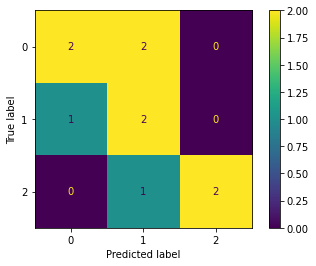

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = np.array(list(set(y_true))) # clf.classes_
);

# fig = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig.plot();

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.40      0.67      0.50         3
           2       1.00      0.67      0.80         3

    accuracy                           0.60        10
   macro avg       0.69      0.61      0.62        10
weighted avg       0.69      0.60      0.62        10



[0.55       0.71428571 1.        ] [1.         0.90909091 0.        ] [0 1]


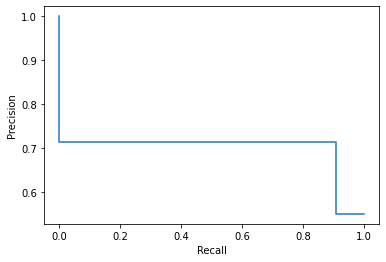

In [57]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
# multiclass format is not supported
y_true = [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
precision, recall, threshold = precision_recall_curve(y_true, y_pred)

print(precision, recall, threshold)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall); 
pr_display.plot();

In [58]:
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, threshold = roc_curve(y_true, y_pred)

print(fpr, tpr, threshold)

[0.         0.44444444 1.        ] [0.         0.90909091 1.        ] [2 1 0]


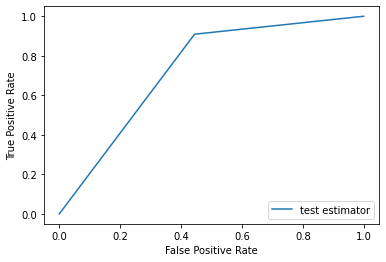

In [61]:
RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name='test estimator').plot();

##### How to extend into multiclass or multilabel problems? 
Can be done using average parameters. 

* **macro** --> calculate the mean of binary metrics 
* **weighted** --> computes the avg of binary metrics in which each class's score is weighted by its presence in the true data sample 
* **micro** --> gives each sample-class pair an equal contribution to the overall metric. 
* **samples** --> calculates the metric over the true and predicted classes or each sample in the evaluation data, and returns their avg. 
* **None** --> an array with the score for each class. 